<a href="https://colab.research.google.com/github/alptekinynk/Advance-Deep-Learning/blob/main/ADL_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# normalization
x_train, x_test = x_train /255.0, x_test / 255.0

In [6]:
# CNN function
def create_cnn(activation_function, input_shape=(32, 32, 3)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.Flatten(),
        layers.Dense(64, activation=activation_function),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [7]:
# Train and Validation function
def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=10):
    # Model derleme
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Modeli eğitme
    history = model.fit(x_train, y_train, epochs=epochs,
                        validation_data=(x_test, y_test), verbose=1)

    return history

In [8]:
def plot_results(history, title):
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Validation plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


Testing Activation Function: sigmoid


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.1387 - loss: 2.2421 - val_accuracy: 0.3560 - val_loss: 1.7809
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.3805 - loss: 1.7098 - val_accuracy: 0.4398 - val_loss: 1.5467
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4449 - loss: 1.5375 - val_accuracy: 0.4698 - val_loss: 1.4698
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4802 - loss: 1.4580 - val_accuracy: 0.4980 - val_loss: 1.4049
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5010 - loss: 1.3872 - val_accuracy: 0.5140 - val_loss: 1.3553
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5216 - loss: 1.3226 - val_accuracy: 0.5294 - val_loss: 1.3143
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5480 - loss: 1.2707 - val_accuracy: 0.5444 - val_loss: 1.2642
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5664 - loss: 1.2209 

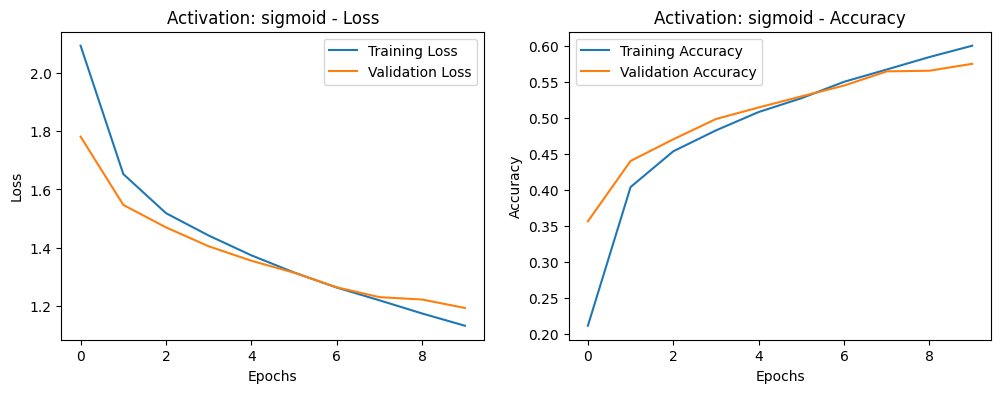


Testing Activation Function: tanh
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4320 - loss: 1.5932 - val_accuracy: 0.5706 - val_loss: 1.2224
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5992 - loss: 1.1409 - val_accuracy: 0.6242 - val_loss: 1.0817
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6456 - loss: 1.0239 - val_accuracy: 0.6274 - val_loss: 1.0723
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6708 - loss: 0.9470 - val_accuracy: 0.6518 - val_loss: 1.0186
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6883 - loss: 0.8956 - val_accuracy: 0.6487 - val_loss: 1.0165
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7038 - loss: 0.8523 - val_accuracy: 0.6669 - val_loss: 0.9724
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7240 - loss: 0.8049 - val_accuracy: 0.6619 - val_loss: 0.9983
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step 

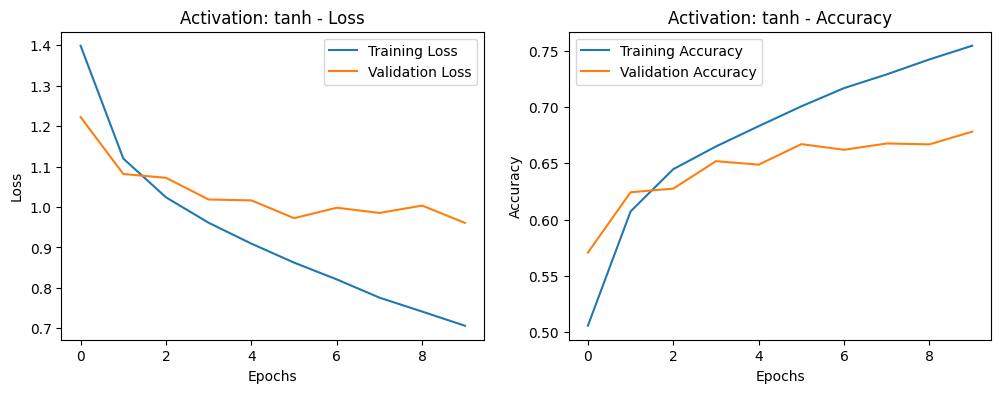


Testing Activation Function: relu
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3247 - loss: 1.8015 - val_accuracy: 0.5095 - val_loss: 1.3393
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5556 - loss: 1.2411 - val_accuracy: 0.6108 - val_loss: 1.1089
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6269 - loss: 1.0588 - val_accuracy: 0.6427 - val_loss: 0.9970
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6627 - loss: 0.9599 - val_accuracy: 0.6645 - val_loss: 0.9776
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6955 - loss: 0.8695 - val_accuracy: 0.6828 - val_loss: 0.9128
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7185 - loss: 0.8050 - val_accuracy: 0.6914 - val_loss: 0.8845
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7328 - loss: 0.7552 - val_accuracy: 0.6910 - val_loss: 0.8940
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step 

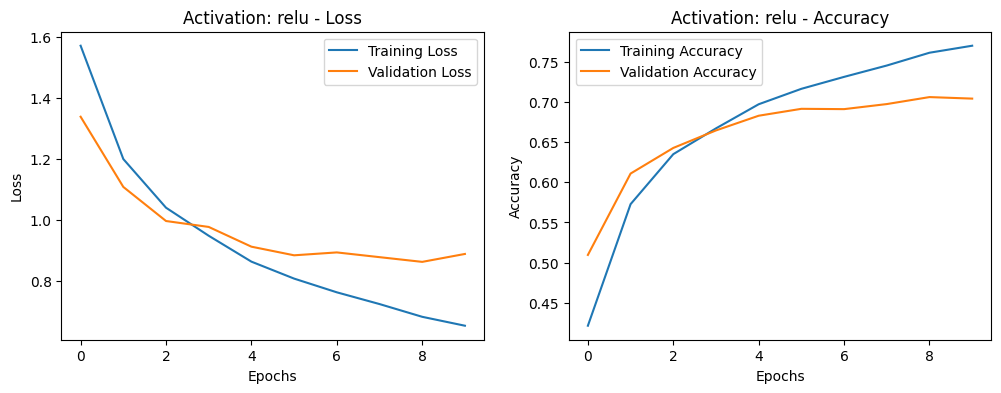


Testing Activation Function: elu
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4341 - loss: 1.5758 - val_accuracy: 0.5742 - val_loss: 1.2179
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6072 - loss: 1.1112 - val_accuracy: 0.6357 - val_loss: 1.0432
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6676 - loss: 0.9493 - val_accuracy: 0.6672 - val_loss: 0.9746
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7062 - loss: 0.8475 - val_accuracy: 0.6824 - val_loss: 0.9278
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7343 - loss: 0.7680 - val_accuracy: 0.6988 - val_loss: 0.8849
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7560 - loss: 0.6939 - val_accuracy: 0.7006 - val_loss: 0.8804
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7818 - loss: 0.6279 - val_accuracy: 0.6976 - val_loss: 0.8892
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step

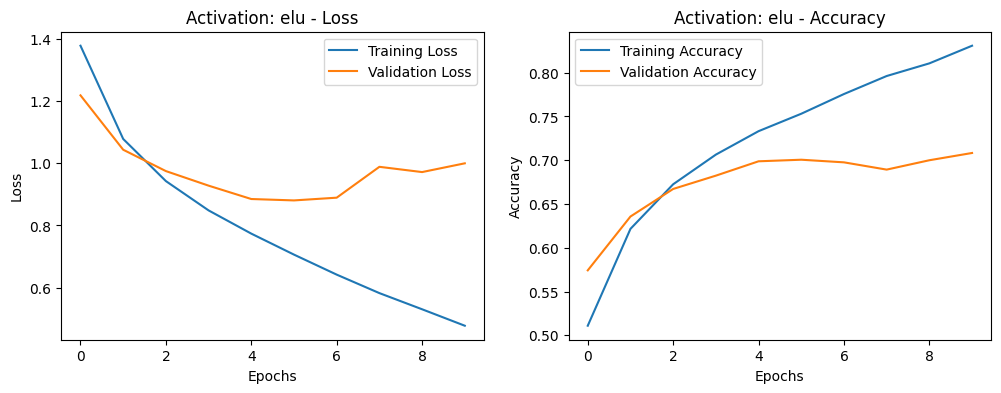


Testing Activation Function: selu
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4183 - loss: 1.6321 - val_accuracy: 0.5357 - val_loss: 1.3214
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5823 - loss: 1.1908 - val_accuracy: 0.6086 - val_loss: 1.1310
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6347 - loss: 1.0440 - val_accuracy: 0.6346 - val_loss: 1.0582
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6701 - loss: 0.9441 - val_accuracy: 0.6590 - val_loss: 0.9988
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6993 - loss: 0.8654 - val_accuracy: 0.6556 - val_loss: 1.0106
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7203 - loss: 0.8026 - val_accuracy: 0.6621 - val_loss: 0.9976
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7383 - loss: 0.7486 - val_accuracy: 0.6678 - val_loss: 0.9971
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step 

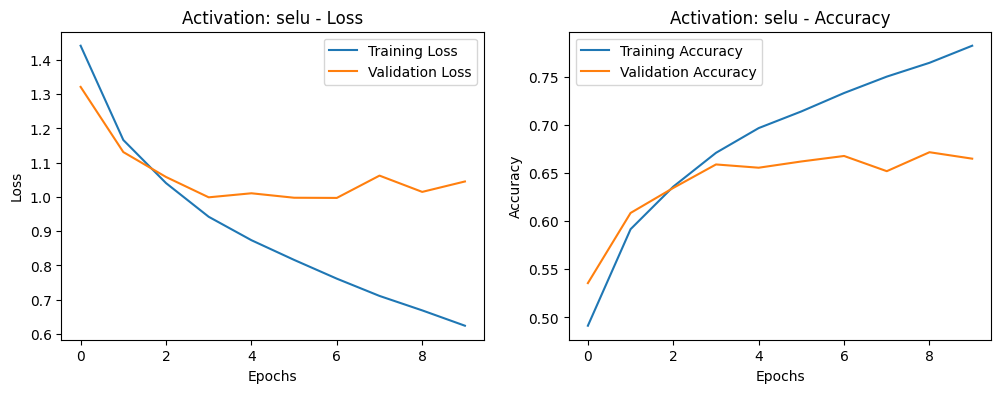

In [9]:
# Activation function list
activations = ['sigmoid', 'tanh', 'relu', 'elu', 'selu']

# Loop activation
for activation in activations:
    print(f'\nTesting Activation Function: {activation}')
    # Create model
    model = create_cnn(activation, input_shape=(32, 32, 3))

    # Train model
    history = train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=10)

    # Plot result
    plot_results(history, f'Activation: {activation}')
